In [ ]:
import pandas as pd

# Reading the CSV file in Google Drive
df_Glassdoor = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vR8cWjOy_sik-TWOSTgO7iOLxDw9RoncLKRsOX8f9s2iQ4T5SPJkUn994mrReTWrFFgdw6VO5QrnWQN/pub?gid=1353870616&single=true&output=csv")
df_Salaries = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQmOSMZxV-FhtU-4xw7Hc971uaYohgp_DUfydnUk6s4igEvws6dnOtRcxlkaJsIV04hIVIxrxg58gjW/pub?gid=364222690&single=true&output=csv")


In [ ]:
df_Glassdoor.shape # (1555, 12)

(1555, 12)

In [ ]:
df_Salaries.shape # (18396, 11)

(18396, 11)

In [ ]:
df_Glassdoor.columns # (1555, 12)

Index(['company', 'company_rating', 'location', 'job_title', 'job_description',
       'salary_estimate', 'company_size', 'company_type', 'company_sector',
       'company_industry', 'company_founded', 'company_revenue'],
      dtype='object')

**Potential useful columns:** ['company', 'location', 'job_title', 'salary_estimate', 'company_size',
       'company_sector', 'company_industry']

In [ ]:
df_Salaries.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

**All columns are useful**

In [ ]:
# Removing the useless columns from the first dataset.
columns_to_drop_1 = ['company', 'company_rating', 'job_description', 'company_type', 'company_founded', 'company_revenue', 'company_sector',	'company_industry']
columns_to_drop_2 = ['salary',	'salary_currency', 'employee_residence',	'company_size']
df_Glassdoor = df_Glassdoor.drop(columns = columns_to_drop_1)
df_Salaries = df_Salaries.drop(columns = columns_to_drop_2)

In [ ]:
# Remove every row with null values in the column 'salary_estimate' in 'df_Glassdoor'
df_Glassdoor = df_Glassdoor.dropna(subset=['salary_estimate'])
df_Glassdoor['salary_estimate'].isnull().sum()

0

In [ ]:
# Cleaning the 'salary_estimate' column
import re

# Function to convert salary rates to yearly rates and clean them
def convert_salary(salary_string):
    if '/hr' in salary_string:
        # Extract numeric value from string and remove non-numeric characters
        hourly_rate = float(re.sub(r'[^\d.]', '', salary_string.split(' ')[0]))
        # Multiply hourly rate by 40 hours per week and then by 52 weeks per year
        yearly_rate = int(hourly_rate * 40 * 52)
        return yearly_rate
    elif '/mo' in salary_string:
        # Extract numeric value from string and remove non-numeric characters
        monthly_rate = float(re.sub(r'[^\d.]', '', salary_string.split(' ')[0]))
        # Multiply monthly rate by 12 to get the yearly rate
        yearly_rate = int(monthly_rate * 12)
        return yearly_rate
    else:
        # Remove non-numeric characters for yearly salaries and convert to integer
        yearly_rate = int(re.sub(r'[^\d]', '', salary_string))
        return yearly_rate

# Apply the conversion function to the 'salary_estimate' column
df_Glassdoor['salary_estimate'] = df_Glassdoor['salary_estimate'].apply(convert_salary)

df_Glassdoor.head()

,location,job_title,salary_estimate,company_size
0,"Riverside, CA",Data Engineer | PAID BOOTCAMP,70000,501 to 1000 Employees
1,"Newton, MS",Snowflake Data Engineer,88400,NaN
2,Remote,Data Engineer (MDM),140400,51 to 200 Employees
4,"Baltimore, MD",Data Engineer,135200,1 to 50 Employees
5,"New York, NY",Data Engineer,237500,1001 to 5000 Employees


In [ ]:
# Create a 'remote_ratio' column using the 'location' values.
df_Glassdoor['remote_ratio'] = df_Glassdoor['location'].apply(lambda x: 1 if x == 'Remote' else 0)

df_Glassdoor.head()

,location,job_title,salary_estimate,company_size,remote_ratio
0,"Riverside, CA",Data Engineer | PAID BOOTCAMP,70000,501 to 1000 Employees,0
1,"Newton, MS",Snowflake Data Engineer,88400,NaN,0
2,Remote,Data Engineer (MDM),140400,51 to 200 Employees,1
4,"Baltimore, MD",Data Engineer,135200,1 to 50 Employees,0
5,"New York, NY",Data Engineer,237500,1001 to 5000 Employees,0


In [ ]:
# Cleaning the 'location' column

# List of valid US state abbreviations
us_state_abbreviations = {
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME',
    'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA',
    'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
}

# Function to extract state code or handle 'Remote'
def extract_state(location):
    if pd.isna(location):
        return "Unknown"
    elif location == 'Remote':
        return location
    else:
        # Split location by comma and strip whitespace
        parts = location.split(',')
        if len(parts) > 1:
            if parts[-1].strip() in us_state_abbreviations:
                return parts[-1].strip()
            else:
                return "Unknown"
        else:
            if location.strip() in us_state_abbreviations:
                return location.strip()
            else:
                return "Unknown"

# Create the 'company_location' column
df_Glassdoor['location'] = df_Glassdoor['location'].apply(extract_state)

df_Glassdoor['location'].unique()

array(['CA', 'MS', 'Remote', 'MD', 'NY', 'MA', 'GA', 'TX', 'UT', 'MN',
       'CT', 'VA', 'NJ', 'Unknown', 'WI', 'IL', 'OR', 'PA', 'OH', 'SC',
       'OK', 'CO', 'NC', 'FL', 'AZ', 'TN', 'KS', 'IA', 'DE', 'WA', 'MI',
       'AL', 'NE', 'KY', 'MO', 'AR', 'ME', 'IN', 'ID', 'NV', 'LA', 'HI',
       'NH', 'WV'], dtype=object)

In [ ]:
# Creation of new columns to match the other dataset layout.
df_Glassdoor['work_year'] = 2023
df_Glassdoor['company_size'] = 'N/A'
df_Glassdoor['experience_level'] = 'N/A'
df_Glassdoor['employment_type'] = 'FT'

In [ ]:
# Re-naming columns
df_Glassdoor.rename(columns={'salary_estimate': 'salary_in_usd'}, inplace=True)
df_Glassdoor.rename(columns={'location': 'company_location'}, inplace=True)

In [ ]:
# Reordering the columns of 'df_Glassdoor'
df_Glassdoor = df_Glassdoor[['work_year', 'company_location', 'job_title', 'salary_in_usd', 'remote_ratio', 'experience_level', 'employment_type']]
df_Glassdoor.head()

,work_year,company_location,job_title,salary_in_usd,remote_ratio,experience_level,employment_type
0,2023,CA,Data Engineer | PAID BOOTCAMP,70000,0,N/A,FT
1,2023,MS,Snowflake Data Engineer,88400,0,N/A,FT
2,2023,Remote,Data Engineer (MDM),140400,1,N/A,FT
4,2023,MD,Data Engineer,135200,0,N/A,FT
5,2023,NY,Data Engineer,237500,0,N/A,FT


In [ ]:
# Re-ordering the columns of 'df_Salaries'
df_Salaries = df_Salaries[['work_year', 'company_location', 'job_title', 'salary_in_usd', 'remote_ratio', 'experience_level', 'employment_type']]
df_Salaries.head()

,work_year,company_location,job_title,salary_in_usd,remote_ratio,experience_level,employment_type
0,2024,US,Data Engineer,194600,0,SE,FT
1,2024,US,Data Engineer,116200,0,SE,FT
2,2024,UA,Data Engineer,120000,0,SE,FT
3,2024,UA,Data Engineer,60000,0,SE,FT
4,2024,US,AI Architect,250000,0,SE,FT


In [ ]:
# Combining the datasets
df_combined = pd.concat([df_Glassdoor, df_Salaries], ignore_index=True)

df_combined

,work_year,company_location,job_title,salary_in_usd,remote_ratio,experience_level,employment_type
0,2023,CA,Data Engineer | PAID BOOTCAMP,70000,0,N/A,FT
1,2023,MS,Snowflake Data Engineer,88400,0,N/A,FT
2,2023,Remote,Data Engineer (MDM),140400,1,N/A,FT
3,2023,MD,Data Engineer,135200,0,N/A,FT
4,2023,NY,Data Engineer,237500,0,N/A,FT
...,...,...,...,...,...,...,...
19668,2020,US,Data Scientist,412000,100,SE,FT
19669,2021,US,Principal Data Scientist,151000,100,MI,FT
19670,2020,US,Data Scientist,105000,100,EN,FT
19671,2020,US,Business Data Analyst,100000,100,EN,CT


In [ ]:
# Replace '100' with '1' and '50' with '0.5' in the 'remote_ratio' column
df_combined['remote_ratio'] = df_combined['remote_ratio'].replace({100: 1, 50: 0.5})

df_combined['remote_ratio'].unique()

array([0. , 1. , 0.5])

In [ ]:
# Filter 'df_Salaries' by just being United States and Full-time employment
filtered_df = df_Salaries[(df_Salaries['company_location'] == 'US') & (df_Salaries['employment_type'] == 'FT') & (df_Salaries['salary_in_usd'] <= 300000)]

filtered_df.shape

(15800, 7)

In [ ]:
# Checking for null values.
df_combined.isnull().any()

work_year           False
company_location    False
job_title           False
salary_in_usd       False
remote_ratio        False
experience_level    False
employment_type     False
dtype: bool

In [ ]:
# Calculate record count and average value for each experience level
summary_data = filtered_df.groupby('experience_level').agg(
    record_count=('experience_level', 'count'),
    average_salary=('salary_in_usd', 'mean'),
).reset_index()

# Create the table DataFrame
pd.DataFrame(summary_data)

,experience_level,record_count,average_salary
0,EN,1136,103201.801937
1,EX,430,188986.600000
2,MI,3878,135088.787519
3,SE,10356,163238.062766


In [ ]:
# Table that shows the highest average salaries per state

# Define the values to exclude
excluded_values = ['Remote', 'Unknown']

# Filter out rows with excluded values in 'company_location' column
df_filtered = df_Glassdoor[~df_Glassdoor['company_location'].isin(excluded_values)]

# Group by 'company_location' and 'job_title' and calculate the required metrics
grouped_df = df_filtered.groupby('company_location').agg(
    record_count=('salary_in_usd', 'size'),
    average_salary=('salary_in_usd', 'mean')
).reset_index()

# Filter to include only rows where 'record_count' is 5 or more
grouped_df = grouped_df[grouped_df['record_count'] >= 5]

# Sort by 'average_salary' in descending order
grouped_df = grouped_df.sort_values(by='average_salary', ascending=False)

# Display the result
grouped_df.head()

,company_location,record_count,average_salary
3,CA,145,140919.282759
29,NY,52,133163.519231
39,WA,40,130640.850000
17,MA,50,116534.620000
27,NJ,45,116348.666667


In [ ]:
# Table that shows which job type (present, hybrid or remote) has a better average salary.
grouped_df_remote = df_combined.groupby('remote_ratio').agg(
    average_salary=('salary_in_usd', 'mean')
).reset_index()

grouped_df_remote

,remote_ratio,average_salary
0,0.0,151271.285973
1,0.5,82984.465863
2,1.0,145533.582505


In [ ]:
# Group by 'work_year' and calculate the average salary
grouped_df_year = filtered_df.groupby('work_year').agg(
    average_salary=('salary_in_usd', 'mean')
).reset_index()

grouped_df_year.head()

,work_year,average_salary
0,2020,125340.642857
1,2021,133800.311828
2,2022,146476.814955
3,2023,155101.594037
4,2024,151716.534063


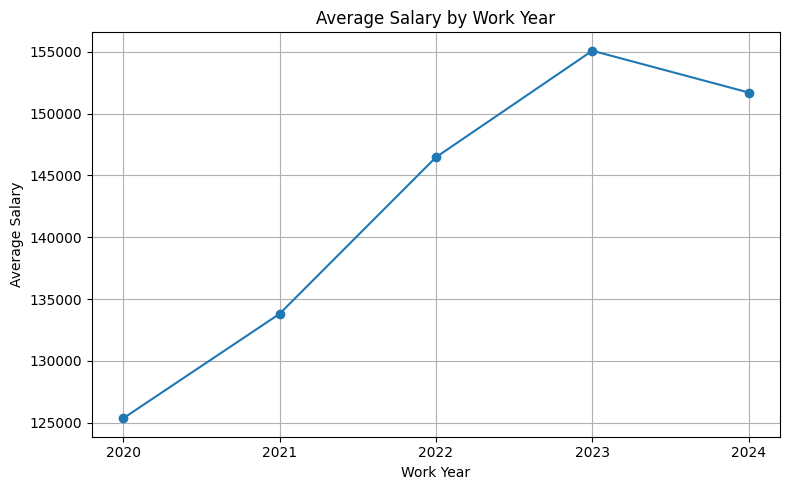

In [ ]:
import matplotlib.pyplot as plt

# Given data
work_years = [2020, 2021, 2022, 2023, 2024]
average_salaries = [125340.642857, 133800.311828, 146476.814955, 155101.594037, 151716.534063]

# Create a line plot
plt.figure(figsize=(8, 5))
plt.plot(work_years, average_salaries, marker='o', linestyle='-')

# Set plot title and labels
plt.title('Average Salary by Work Year')
plt.xlabel('Work Year')
plt.ylabel('Average Salary')

# Set x-axis ticks to be the work years
plt.xticks(work_years)

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Group by 'job_title' and calculate the average salary and record count
grouped_df_year = filtered_df.groupby('job_title').agg(
    average_salary=('salary_in_usd', 'mean'),
    record_count=('salary_in_usd', 'count')
).reset_index()

# Filter the DataFrame to include only rows where 'record_count' is 5 or more
grouped_df_year_filtered = grouped_df_year[grouped_df_year['record_count'] >= 5]

grouped_df_year_filtered.head(10)

,job_title,average_salary,record_count
0,AI Architect,196182.866667,30
1,AI Developer,188444.444444,9
2,AI Engineer,160969.508333,120
5,AI Scientist,160173.812500,16
6,AI Software Engineer,151121.000000,6
9,Analytics Engineer,153950.909561,387
12,Applied Machine Learning Scientist,101342.857143,7
13,Applied Scientist,186366.343373,498
14,BI Analyst,124360.888889,45
15,BI Data Analyst,79028.777778,9
